In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.append('../../../')

In [3]:
from cnvfc import stats as cst
from cnvfc import tools as ctl
import numpy as np
import pandas as pd
import pathlib as pal
import seaborn as sbn
from matplotlib import pyplot as plt
from statsmodels.sandbox.stats.multicomp import multipletests as stm

In [4]:
n_iter = 1000
root_p = pal.Path('../../../data/')
del_v_con_p = root_p / 'processed/fc_profiles/cnv_22q_del_vs_con.tsv'
dc_null_p = root_p / 'processed/null_model/cnv_22q_null_model_genetic_status_deletion_vs_control.npy'
dup_v_con_p = root_p / 'processed/fc_profiles/cnv_22q_dup_vs_con.tsv'
dp_null_p = root_p / 'processed/null_model/cnv_22q_null_model_genetic_status_duplication_vs_control.npy'

In [5]:
dc = pd.read_csv(del_v_con_p, sep='\t')
dp = pd.read_csv(dup_v_con_p, sep='\t')
dc_null = np.load(dc_null_p)
dp_null = np.load(dp_null_p)

In [6]:
print('The average FC shift across all connections '
      'is \n{:.2f}z for DEL and \n{:.2f}z for DUP carriers '
      '\nin units of SD FC of CON subjects'.format(np.mean(dc.stand_betas),
                                                   np.mean(dp.stand_betas)))

The average FC shift across all connections is 
-0.25z for DEL and 
0.28z for DUP carriers 
in units of SD FC of CON subjects


## 22q deletion

In [7]:
print(ctl.report_connectivity_alterations(dc))

There are 38 significant connections out of 2080.
Of those, 0 show an increase and 38 show a decrease in connectivity.
The range of effects is:
Positive effects (z-scores): n.s. to n.s.
Negative effects (z-scores): -1.607 to -0.841


## 22q duplication

In [8]:
print(ctl.report_connectivity_alterations(dp))

There are 13 significant connections out of 2080.
Of those, 13 show an increase and 0 show a decrease in connectivity.
The range of effects is:
Positive effects (z-scores): 1.486 to 1.916
Negative effects (z-scores): n.s. to n.s.


## Visualize the alterations

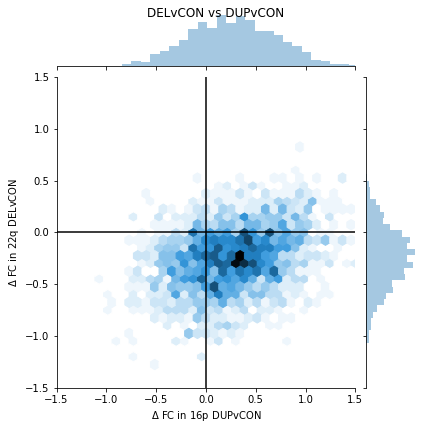

In [9]:
# Display the global FC alterations of DELvCON and DUPvCON against each other
r = 1.5
g = sbn.jointplot(x=dp.stand_betas, y=dc.stand_betas, 
                  kind='hex', ylim=(-r, r), xlim=(-r, r), joint_kws={"extent": (-r, r, -r, r)},
                 stat_func=None)
g.ax_joint.plot([0, 0], [-r, r], 'k')
g.ax_joint.plot([-r, r], [0, 0], 'k')
tmp = g.ax_joint.set(xlabel='$\Delta$ FC in 16p DUPvCON', ylabel='$\Delta$ FC in 22q DELvCON')
g.fig.suptitle('DELvCON vs DUPvCON');

## Put the global shifts into context of a null model

In [10]:
dc_null_beta = np.mean(dc_null, 1)
dp_null_beta = np.mean(dp_null, 1)

In [11]:
dc_emp_beta = np.mean(dc.stand_betas)
dp_emp_beta = np.mean(dp.stand_betas)

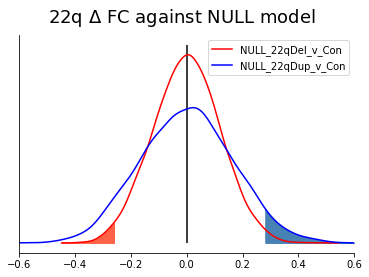

In [12]:
f = plt.figure(figsize=(6,4))
ax = plt.subplot(111)
# Plot the 16pDEL 
g_delcon = sbn.distplot(dc_null_beta, hist=False, kde=True, ax=ax, label='NULL_22qDel_v_Con', color='red')
g_dupcon = sbn.distplot(dp_null_beta, hist=False, kde=True, ax=ax, label='NULL_22qDup_v_Con', color='blue')
# Now add the area under the curve
d_delcon = g_delcon.axes.lines[0].get_data()
d_dupcon = g_dupcon.axes.lines[1].get_data()
cut_delcon = np.max(np.where(dc_emp_beta > d_delcon[0]))
cut_dupcon = np.min(np.where(dp_emp_beta < d_dupcon[0]))
ax.fill_between(d_delcon[0][:cut_delcon], 0, d_delcon[1][:cut_delcon], color='tomato')
ax.fill_between(d_dupcon[0][cut_dupcon:], 0, d_dupcon[1][cut_dupcon:], color='steelblue')
ax.vlines(0, ax.get_ylim()[1], 0)
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xlim([-0.6, 0.6])
sbn.despine(ax=ax)
f.suptitle('22q $\Delta$ FC against NULL model', fontsize=18);

In [13]:
p_delcon = np.abs((np.sum(dc_emp_beta > dc_null_beta)+1)/(n_iter+1))
p_dupcon = np.abs((np.sum(dp_emp_beta < dp_null_beta)+1)/(n_iter+1))

In [14]:
print('On average 22q11.2 carriers have a shift of '
      '\n{:.2f}z-scores (p={:.3f}) for DEL carriers and '
      '\n{:.2f}z-scores (p={:.3f}) for DUP carriers.'.format(dc_emp_beta, p_delcon,
                                                            dp_emp_beta, p_dupcon))

On average 22q11.2 carriers have a shift of 
-0.25z-scores (p=0.080) for DEL carriers and 
0.28z-scores (p=0.225) for DUP carriers.
